We wish to represent a scenario of dartboard shooting with Python classes. Each dart thrown is recorded as a 2-dimensional point on a board like the one in the figure.

### Ex 1) [4pts]
Each DartPoint has attributes: x-coordinate, y-coordinate, and distance from the center (origin of the Cartesian axes). Build the DartPoint class with:

Constructor:

-A method to calculate the distance from the origin.

-A method to calculate the distance between two points.

 ### Ex2[4pts]

 The target includes a central area (the closest one to the origin, i.e., a circle of radius 10) and a medium area (concentric, with inner radius 10 and outer radius 20). The square that houses the target at its center has a side of 60.

Within the DartPoint class, implement a static method score(point) that returns the following scores:

• 3 if the dart was dropped in the central area;

• 1 if the dart was dropped in the medium area;

• 0 if the dart is in the square but not inside the target; • -1 if the dart is outside the square.


In [124]:
import os


class DartPoint:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return f'Point({self.x}, {self.y}) '

    @property
    def to_center(self):
        return (self.x**2 + self.y**2)**0.5

    @staticmethod
    def distance(p1,p2):
        if isinstance(p1,DartPoint) and isinstance(p2,DartPoint):
            return ((p1.x - p2.x)**2 + (p1.y - p2.y)**2)**0.5
        else:
            raise TypeError('p1 and p2 must be DartPoint')

    @staticmethod
    def Score(p1):
        if isinstance(p1,DartPoint):
            center=DartPoint(10,10).to_center
            medium=DartPoint(20,20).to_center
            p=p1.to_center
            if p<center:
                return 3
            elif p>center and p<medium:
                return 1
            elif p>medium and p<60:
                return 0
            else:
                return -1


p1= DartPoint(4,1)
p2= DartPoint(102,233)
p3= DartPoint(15,15)
p4= DartPoint(21,17)
print(p1)
print("it's distance to p2=", DartPoint.distance(p1,p2))
score = DartPoint.Score(p1)
print("SCORE:", score)



Point(4, 1) 
it's distance to p2= 251.8491612056709
SCORE: 3


### Ex 3) [5pts]
Implement a Round class that keeps, as an attribute, a list of DartPoints. These are added one by one to the Round, with an

appropriate method that checks the object type; if this is not as expected, the method raises a user-defined exception that should be handled.

In [125]:
class NotValid(Exception):
    pass

class Round:
    def __init__(self):
        self.points = []

    def __iter__(self):
        return iter(self.points)

    def __str__(self):
        ls=', '.join([str(p) for p in self.points])
        return f'This round: [{ls}]'


    def addPoint(self, point):
      try:
        if isinstance(point, DartPoint):
            self.points.append(point)
        else:
            raise NotValid ('you must insert a DartPoint!')
      except NotValid as e:
          print(e)

    def Printer(self):
      with open ('external.txt', 'w') as f:
        points= ', '.join([str(p)for p in self.points ])
        num= f'number of dartpoints in this round: {len(self.points)}'
        scores=[DartPoint.Score(p) for p in self.points]
        pairwise=[DartPoint.distance(self.points[i], self.points[j]) for i in range(0,len(self.points)-1)
                   for j in range(i+1,len(self.points))]
        total=sum(scores)
        if not any(d>5 for d in pairwise):
                total +=10
        total_score= f'total score: {total}'

        res= f'{scores.count(3)} points in centeral area\n{scores.count(1)} points in medium area\n{scores.count(-1)} points outside'
        mn= min([p.to_center for p in self.points])
        closest= f"the closest point(s): { ', '.join( [str(p) for p in self.points if p.to_center==mn] )}"
        f.writelines('\n'.join([points, num, total_score,res, closest]))
      with open('external.txt','r') as f:
            fl='\n'.join(f.readlines())
      print(fl)
      return fl


round1 =Round()
round1.addPoint(p1)
round1.addPoint(p2)
round1.addPoint(p3)
round1.addPoint(p4)
round1.Printer()
print(a)



Point(4, 1) , Point(102, 233) , Point(15, 15) , Point(21, 17) 

number of dartpoints in this round: 4

total score: 4

1 points in centeral area

2 points in medium area

1 points outside

the closest point(s): Point(4, 1) 
1


### Ex 4) [9pts]
In the Round class, implement a method that prints, to an external file, the following information:

- all the DartPoints (hint: these are complex objects);
-
- the number of DartPoints in the Round;
-
- a total score, calculated as the sum of the score of each dart (see Ex 2), plus a +10 bonus, awarded
-
when the pair-wise distance between each two darts never exceeds 5;

- the number of DartPoints dropped respectively in the central, medium, and outside areas; - the DartPoint(s) that are closest to the origin.
Note: solutions using list comprehension, in any of the points above, are preferred [+1pt].


### Ex 5) [5pts]
 In the main code, show an example of instantiation of the created classes, with at least four DartPoints, which are all included in one Round. For the Round that you created:
- call the method implemented in Ex 4 to print the report;
- show the boxplot of all the distances from the origin of the included DartPoints, excluding points
outside of the square.

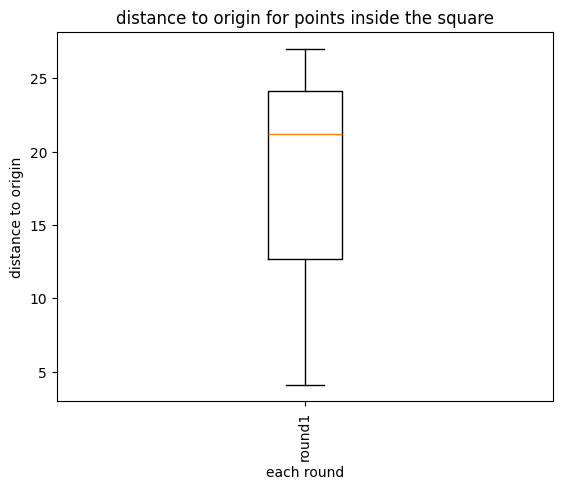

In [141]:
x=[p.to_center for p in round1.points if DartPoint.Score(p) != -1]
import matplotlib.pyplot as plt
plt.boxplot(x)
plt.title('distance to origin for points inside the square')
plt.xlabel('each round')
plt.ylabel('distance to origin')
plt.xticks([1],['round1'], rotation=90)
plt.show()